In [154]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [155]:
cancer_data = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
cancer_data_cleaned= cancer_data.drop(cancer_data.columns[32], axis=1)
cancer_data_cleaned= cancer_data.drop(["id","diagnosis",'Unnamed: 32'], axis=1)
cancer_data_labels= cancer_data["diagnosis"]
#print(cancer_data_labels.head())
cancer_data_cleaned.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [156]:
cancer_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 non-null float64
symmetry_se                569 

In [157]:
cancer_data_cleaned.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:3

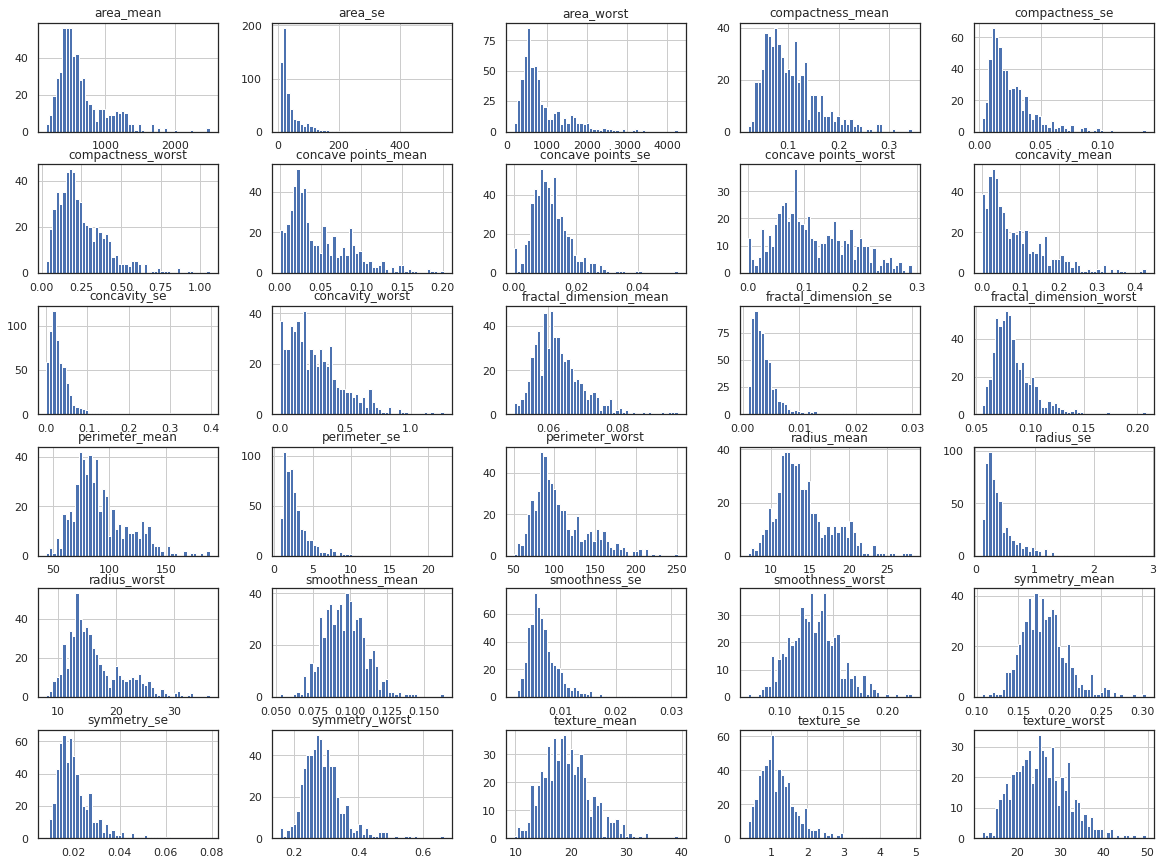

In [158]:
%matplotlib inline
import matplotlib.pyplot as plt
cancer_data_cleaned.hist(bins=50,figsize=(20,15))
plt.show()

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size= 0.2 ,random_state=42)
for train_index,test_index in split.split(cancer_data_cleaned,cancer_data_cleaned["diagnosis"]):
    strat_train_set = cancer_data_cleaned.loc[train_index]
    strat_test_set = cancer_data_cleaned.loc[test_index]
strat_test_set["diagnosis"].value_counts()/len(strat_test_set)




Number of Benign:  357
Number of Malignant:  212


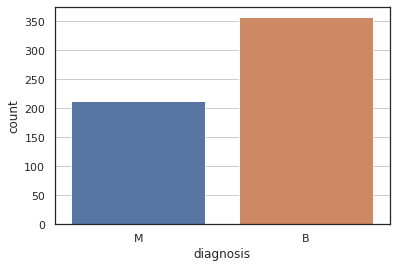

In [159]:
cancer_data_labels.hist()
#lets plot better visualization 

ax= sns.countplot(cancer_data_labels,label="Count")
B,M = cancer_data_labels.value_counts()
print("Number of Benign: ", B)
print("Number of Malignant: ", M)


In [160]:
cancer = cancer_data_cleaned.copy()

# Visualization

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

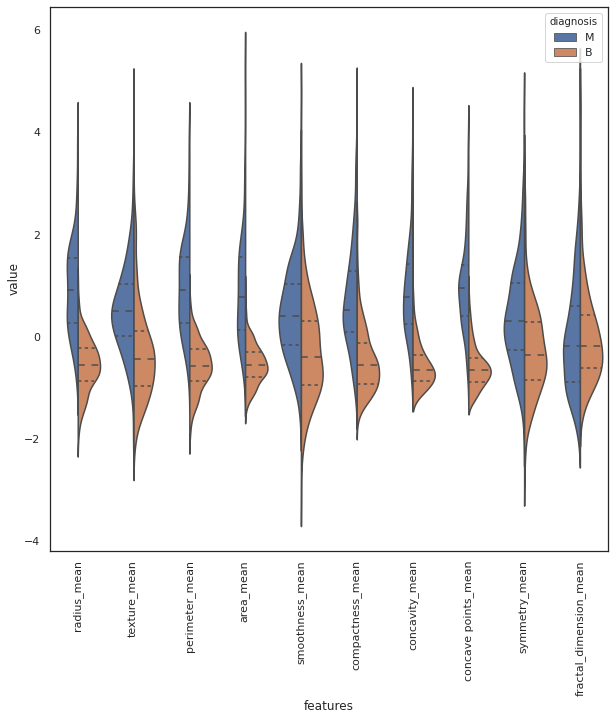

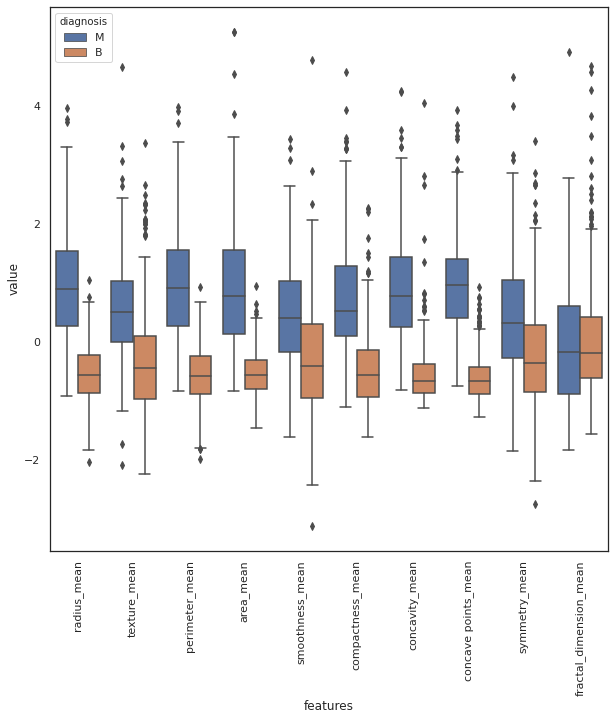

In [161]:
data_dia = cancer_data_labels
data = cancer
data_n_2 = (data-data.mean()) / (data.std())
data = pd.concat([cancer_data_labels,data_n_2.iloc[:,0:10]],axis=1)
#print(data)
data = pd.melt(data,id_vars="diagnosis",var_name="features",value_name="value")
#print(data)
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

#box plot

# box plots are also useful in terms of seeing outliers
# I do not visualize all features with box plot
# In order to show you lets have an example of box plot
# If you want, you can visualize other features as well.
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

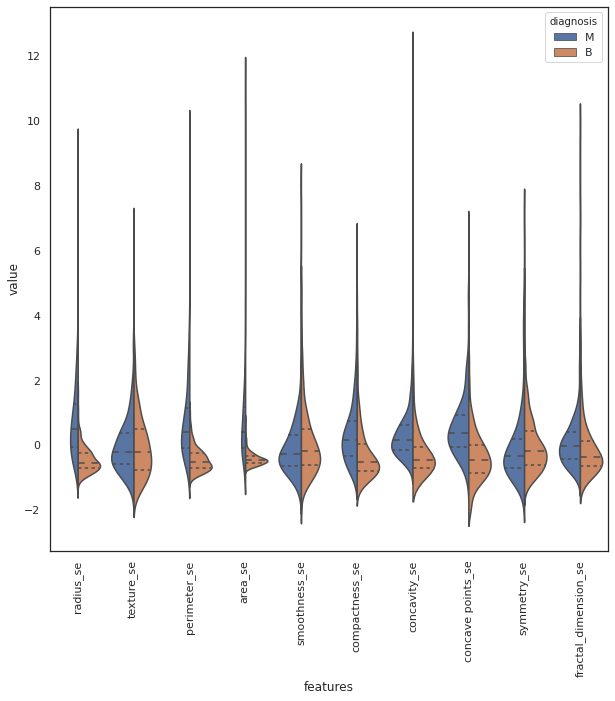

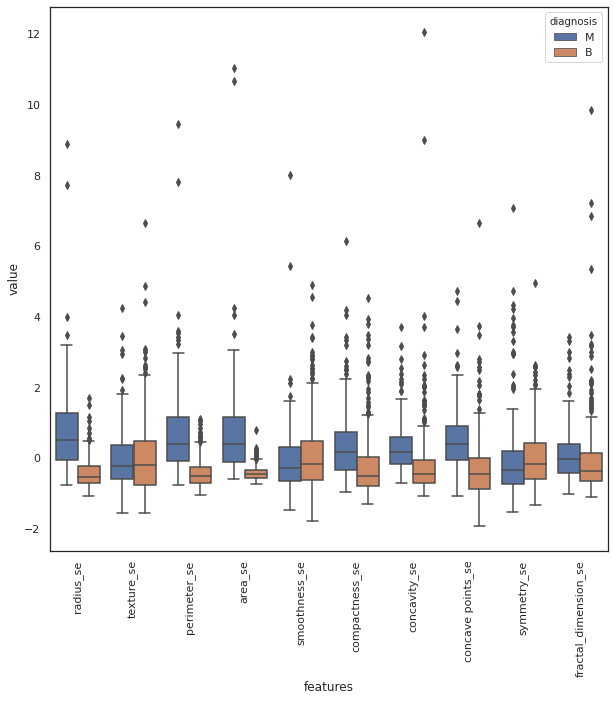

In [162]:
# Next 10 features
data = pd.concat([cancer_data_labels,data_n_2.iloc[:,10:20]],axis=1)
#print(data)
data = pd.melt(data,id_vars="diagnosis",var_name="features",value_name="value")
#print(data)
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

#box Plot

# box plots are also useful in terms of seeing outliers
# I do not visualize all features with box plot
# In order to show you lets have an example of box plot
# If you want, you can visualize other features as well.
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

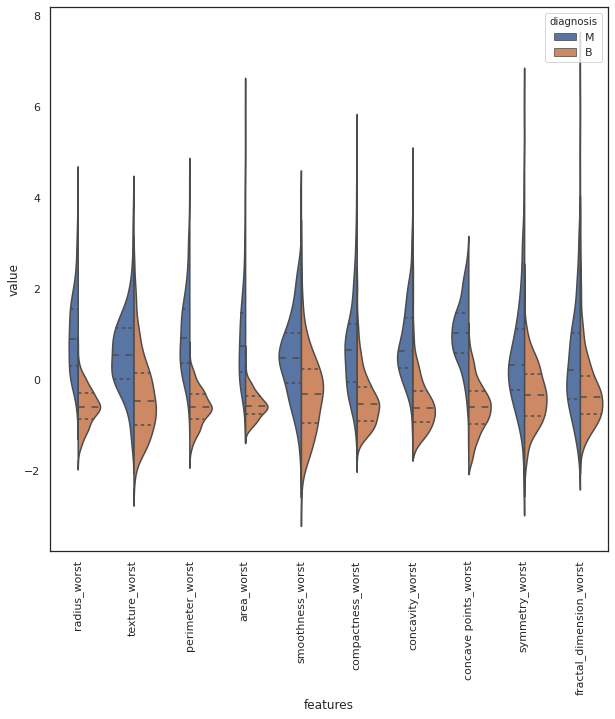

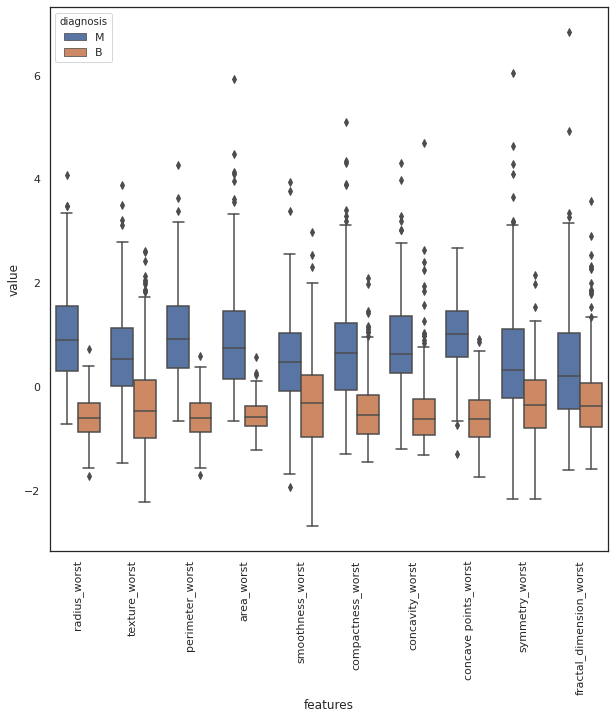

In [163]:
# Next 10 features
data = pd.concat([cancer_data_labels,data_n_2.iloc[:,20:31]],axis=1)
#print(data)
data = pd.melt(data,id_vars="diagnosis",var_name="features",value_name="value")
#print(data)
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

#box Plot

# box plots are also useful in terms of seeing outliers
# I do not visualize all features with box plot
# In order to show you lets have an example of box plot
# If you want, you can visualize other features as well.
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)



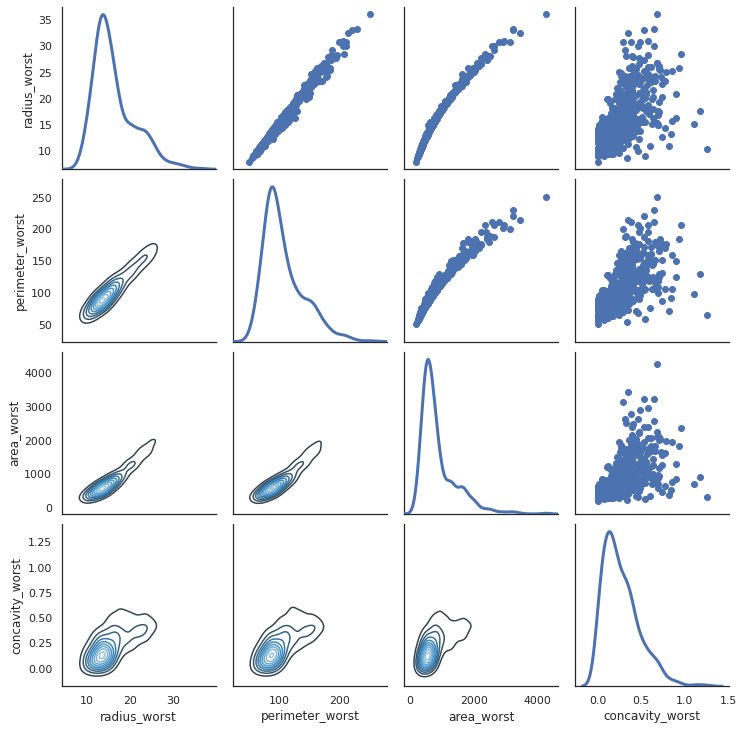

In [164]:
#lets find out more

sns.set(style="white")
df= cancer.loc[:,['radius_worst','perimeter_worst','area_worst','concavity_worst']]
g =sns.PairGrid(df,diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)


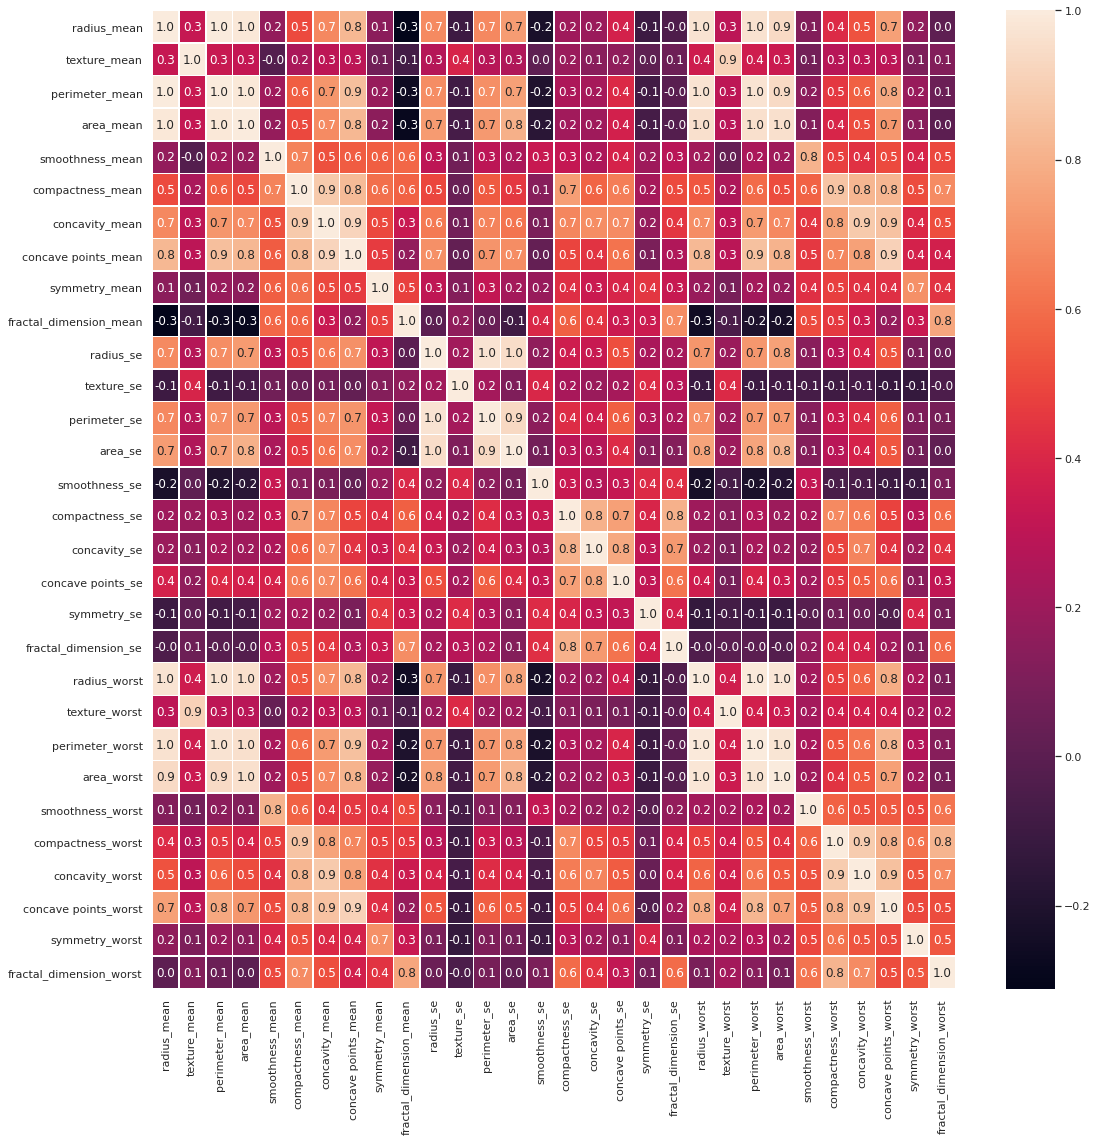

In [165]:
# lets find out correaltion plot

f,ax =plt.subplots(figsize=(18,18))
sns.heatmap(cancer.corr(),annot= True, linewidths='.5', fmt ='.1f',ax=ax)


In [166]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst',
              'compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']

cancer_new = cancer.drop(drop_list1,axis=1)
cancer_new.head()



,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


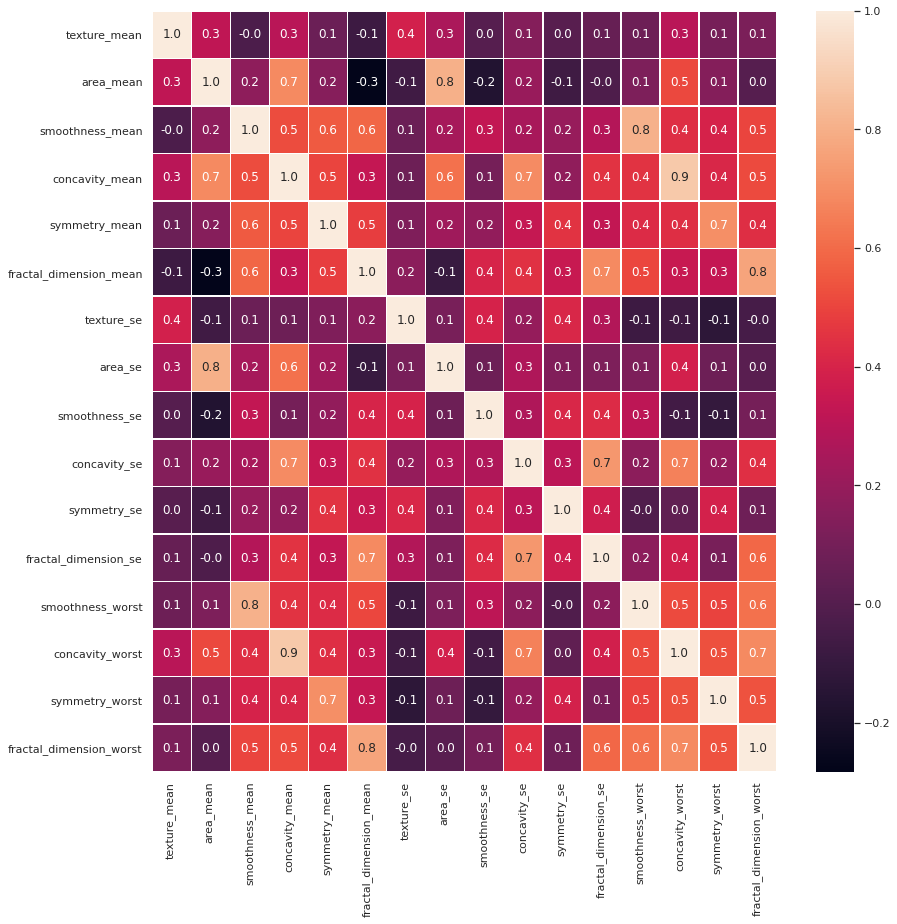

In [167]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(cancer_new.corr(),annot= True, linewidths='.5', fmt ='.1f',ax=ax)


In [174]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

full_pipeline = Pipeline([
    ('std_scaler',StandardScaler())
])

#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labeltencoder_Y = LabelEncoder()
cancer_data_labels_encoded = labeltencoder_Y.fit_transform(cancer_data_labels)
#print(cancer_data_labels_encoded)
print(cancer_data_labels)
print(cancer_new.info())
from sklearn.model_selection import train_test_split
X_train_set,X_test_set,Y_train_set,Y_test_set =train_test_split(cancer_new,cancer_data_labels_encoded,test_size=0.25,random_state=0)

X_train_prepared = full_pipeline.fit_transform(X_train_set)
X_test_prepared = full_pipeline.transform(X_test_set)


0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 16 columns):
texture_mean               569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
concavity_mean             569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
texture_se                 569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
concavity_se               569 non-null float64
symmetry_se                569 non-null float64
fractal_dimension_se       569 non-null float64
smoothness_worst           569 non-null float64
concavity_worst            569 non-null float64
symmetry_worst             569 non-null float64
fractal_dimension_worst    569 n

In [179]:
from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression(random_state = 0)

log_reg.fit(X_train_set,Y_train_set)


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [180]:

cancer_predicted = log_reg.predict(X_test_set)
cancer_predicted


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [181]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test_set, cancer_predicted)
print(cm)

def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements

acc = accuracy(cm)
print(acc*100)

[[83  7]
 [ 1 52]]
94.4055944055944


In [183]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train_set,Y_train_set)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [184]:
cancer_predicted_rf = rf_classifier.predict(X_test_set)
print(accuracy(confusion_matrix(Y_test_set, cancer_predicted_rf)))

0.951048951048951


In [185]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT_classifier.fit(X_train_set,Y_train_set)
cancer_predicted_DT = DT_classifier.predict(X_test_set)
print(accuracy(confusion_matrix(Y_test_set, cancer_predicted_DT)))


0.951048951048951


In [186]:
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'linear', random_state = 0)
svm_classifier.fit(X_train_set,Y_train_set)
cancer_predicted_svm = svm_classifier.predict(X_test_set)
print(accuracy(confusion_matrix(Y_test_set, cancer_predicted_svm)))


0.958041958041958


In [187]:
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'rbf', random_state = 0)
svm_classifier.fit(X_train_set,Y_train_set)
cancer_predicted_svm = svm_classifier.predict(X_test_set)
print(accuracy(confusion_matrix(Y_test_set, cancer_predicted_svm)))


0.8811188811188811


In [193]:
# logistic regression with C param
#The trade-off parameter of logistic regression that determines the strength of the regularization is called C, 
#and higher values of C correspond to less regularization (where we can specify the regularization function).
#C is actually the Inverse of regularization strength(lambda)

log_reg100 = LogisticRegression(C=100)
log_reg100.fit(X_train_set,Y_train_set)
cancer_predicted_logC100 = log_reg100.predict(X_test_set)
print(accuracy(confusion_matrix(Y_test_set, cancer_predicted_logC100)))

0.951048951048951


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
